In [1]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [27]:
!python3 -m spacy download en_core_web_lg

2022-10-14 05:12:56.133787: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.7 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [28]:
nlp = spacy.load('en_core_web_lg')

In [3]:
%pip install PyPDF2
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
with open('clrs.pdf', 'rb') as file:
    reader = PyPDF2.PdfFileReader(file)
    num = reader.getNumPages()
    print(f"Number of {num} pages found!")

    whole_text = ""
    for i in range(num):
        whole_text += reader.getPage(i).extract_text()
        print(f'\rPage {i + 1} is read!', end='')

Number of 1313 pages found!
Page 1313 is read!

## Function
This function will be used through out the whole notebook

In [8]:
def token_frequency(txt, not_include=[], only_include=[], verbos=False):
    if len(not_include) != 0 and len(only_include) != 0: 
        raise Exception('Cannot specify both "not_include" and "only_include"')
    words = dict()
    doc = nlp(txt)
    for token in doc:
        if token.pos_ in not_include: continue
        if len(only_include) != 0 and token.pos_ not in only_include: continue
        if nlp.vocab[token.lemma_].is_stop: continue
        if token.lemma_ not in words.keys():
            words[token.lemma_] = 1
        else: words[token.lemma_] += 1
        if verbos: print(f"{token.text:{16}} {token.pos_:{12}} {token.dep_:{12}} {token.lemma_:{16}} {spacy.explain(token.tag_)}")
    
    words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
    return words

## CLRS : Introduction to algorithm

In [29]:
words = token_frequency(whole_text[:1000000], not_include=['SPACE', 'PUNCT', 'NUM', 'SYM', 'X'], verbos=False)

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [31]:
df = pd.DataFrame({'word':words.keys(), 'frequency':words.values()})
df.head(30)

,word,frequency
0,time,1155
1,tree,1140
2,algorithm,826
3,node,761
4,use,753
5,n,679
6,element,665
7,key,663
8,sort,656
9,number,584


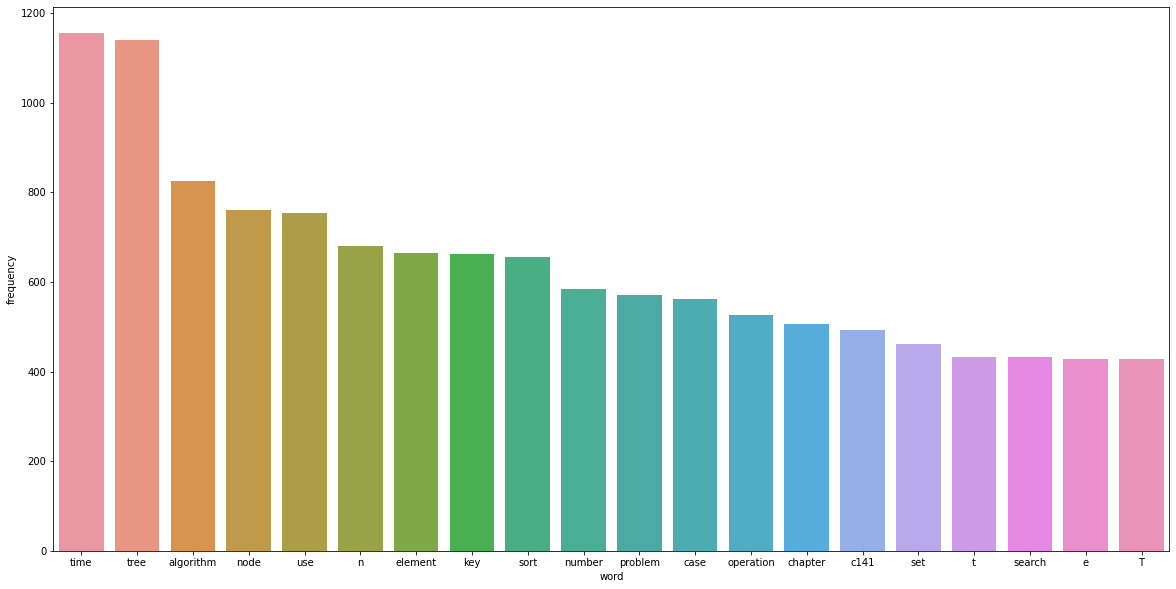

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df.iloc[:20], x='word', y='frequency');

In [35]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(words)

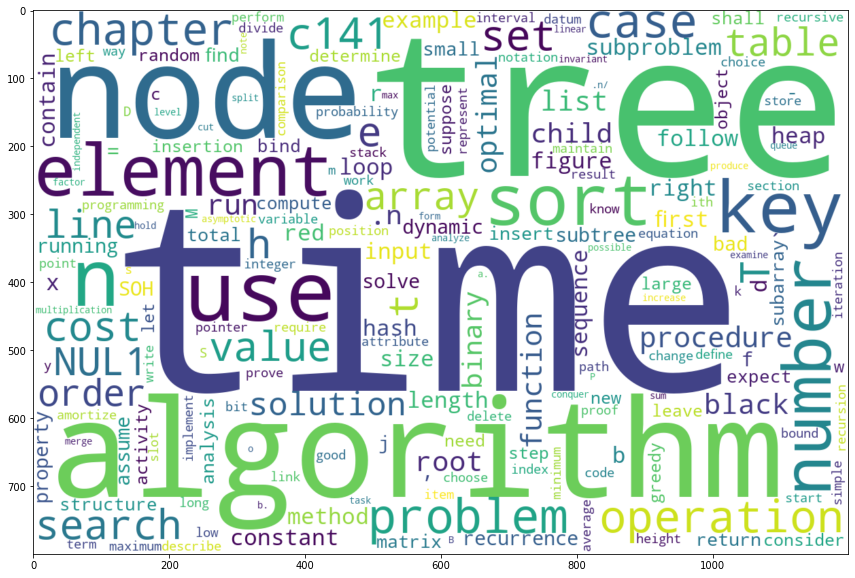

In [36]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')

In [38]:
verbs = token_frequency(whole_text[:1000000], only_include=['VERB'], verbos=False)

In [39]:
verbs_df = pd.DataFrame({'word':verbs.keys(), 'frequency':verbs.values()})
verbs_df.head(20)

,word,frequency
0,use,716
1,sort,345
2,run,295
3,follow,237
4,contain,225
5,assume,218
6,solve,216
7,bind,178
8,expect,176
9,determine,170


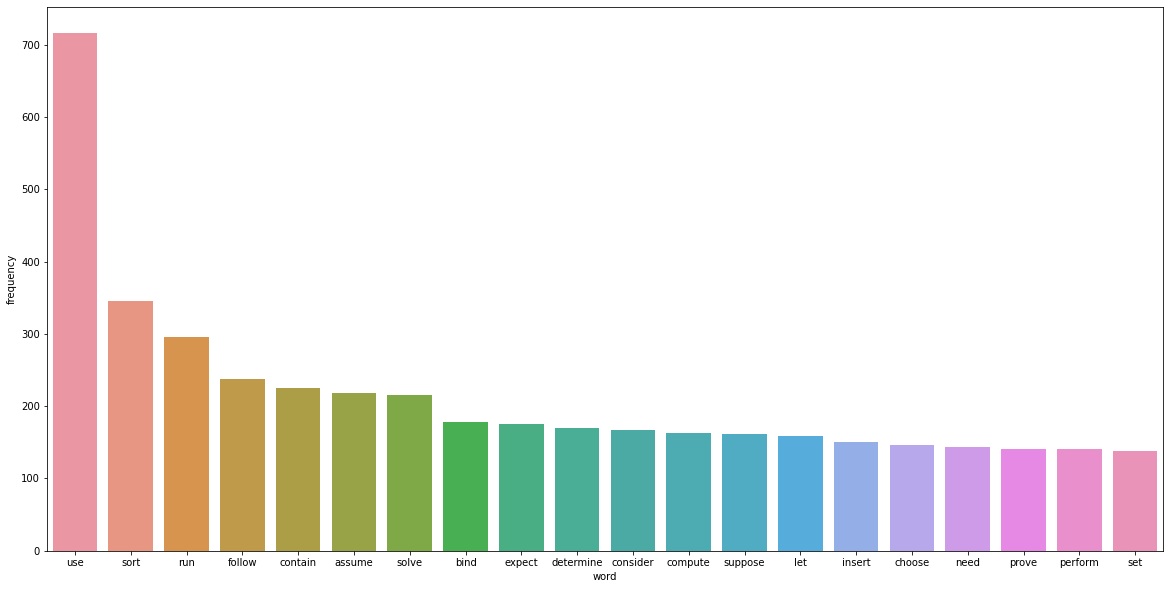

In [40]:
plt.figure(figsize=(20, 10))
sns.barplot(data=verbs_df.iloc[:20], x='word', y='frequency');

In [41]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(verbs)

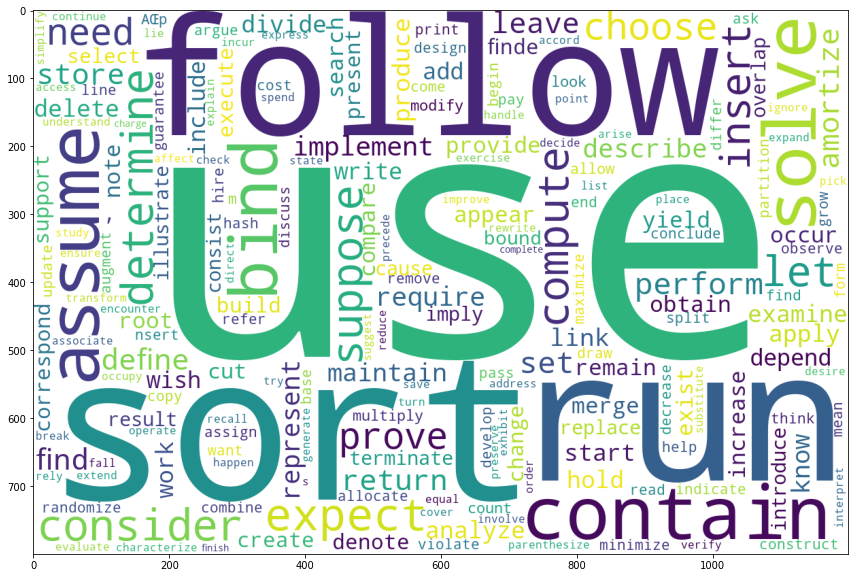

In [42]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);

## Calculating Lexical diversity score

In [44]:
lemmas = []
for token in nlp(whole_text[:1000000]):
    if token.pos_ in ['PUNCT', 'NUM', 'SPACE', 'X', 'PROPN', 'SYM']: continue
    if token.is_stop: continue
    lemmas.append(token.lemma_)

lemmas[:100]

['introduction',
 'right',
 'reserve',
 'book',
 'reproduce',
 'form',
 'electronic',
 'mechanical',
 'mean',
 'include',
 'photocopying',
 'recording',
 'information',
 'storage',
 'retrieval',
 'permission',
 'write',
 'publisher',
 'information',
 'special',
 'quantity',
 'discount',
 'email',
 'special',
 'book',
 'set',
 'author',
 'print',
 'bind',
 'algorithm',
 'ta',
 'l',
 'r',
 'd',
 'p.',
 'include',
 'bibliographical',
 'reference',
 'index',
 'hardcover',
 'paper)—isbn',
 'paper',
 'computer',
 'programming',
 'computer',
 'algorithm',
 'dc22',
 '098765432content',
 'preface',
 'xiii',
 'foundation',
 'introduction',
 'role',
 'algorithm',
 'algorithm',
 'technology',
 'getting',
 'start',
 'insertion',
 'sort',
 'analyzing',
 'algorithm',
 'designing',
 'algorithm',
 'notation',
 'notation',
 'common',
 'function',
 'conquer',
 'maximum',
 'subarray',
 'problem',
 'algorithm',
 'matrix',
 'multiplication',
 'substitution',
 'method',
 'solve',
 'recurrence',
 'recursion',

In [45]:
%pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 5.2 MB/s 


In [47]:
ld.ttr(lemmas)

0.10905705367787914

In [51]:
ld.msttr(lemmas, window_length=1000)

0.3783918918918919

In [52]:
print(f'The size of tokens is {len(lemmas)}')

The size of tokens is 74649
